# K-Nearest Neighbors Classifier - the Random Dataset

### Importing the necessary libraries

In [1]:
# The function which will generate the random set of datapoints
# and will distribute them into a specified number of classes
from sklearn.datasets import make_blobs
#THIS FUNCTION WE USE THAT TO CREATE RANDOM CLUSTERS AND HERE WE CREATE RANDOM CLUSTERS OF DATA POINTS

# A module for handling data
import pandas as pd

# Python's plotting module.
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The K-nearest neighbors classifier from the sklearn library
from sklearn.neighbors import KNeighborsClassifier

# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

# A class that would help us find the best model from a specified set of models.
from sklearn.model_selection import GridSearchCV


# This library will be used to measure the difference in times between the start and the end of a process
import time

# The Python package for scientific computing
import numpy as np

### Generating the database

In [2]:
# Generate normally distributed datapoints belonging to three separate clusters.
# Let the total number of points be 1000.
# Let us choose a center for each of the three classes.
# The 'random state' parameter ensures that each run would produce the same distribution of points
inputs, target = make_blobs(n_samples = 1000,
                            centers = [(-3, 3), (0, 0), (2, 2)],
                            random_state = 365)

In [3]:
# Return the shapes of the inputs and the targets.
# We see that 'inputs' consists of 1000 rows and 2 columns while
# 'targets' stores 1000 items.
inputs.shape, target.shape

((1000, 2), (1000,))

In [4]:
# Using the 'inputs' and 'target' variables from above, let's create a dataframe.
# The 'inputs' variable stores the two 'features' which represent the x- and y-coordinates of each datapoint.
# The 'target' variable stores the classes.
data = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
data['Target'] = target
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


### Plotting the database

In [5]:
# Create a color palette
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

Plot all data points based on colors

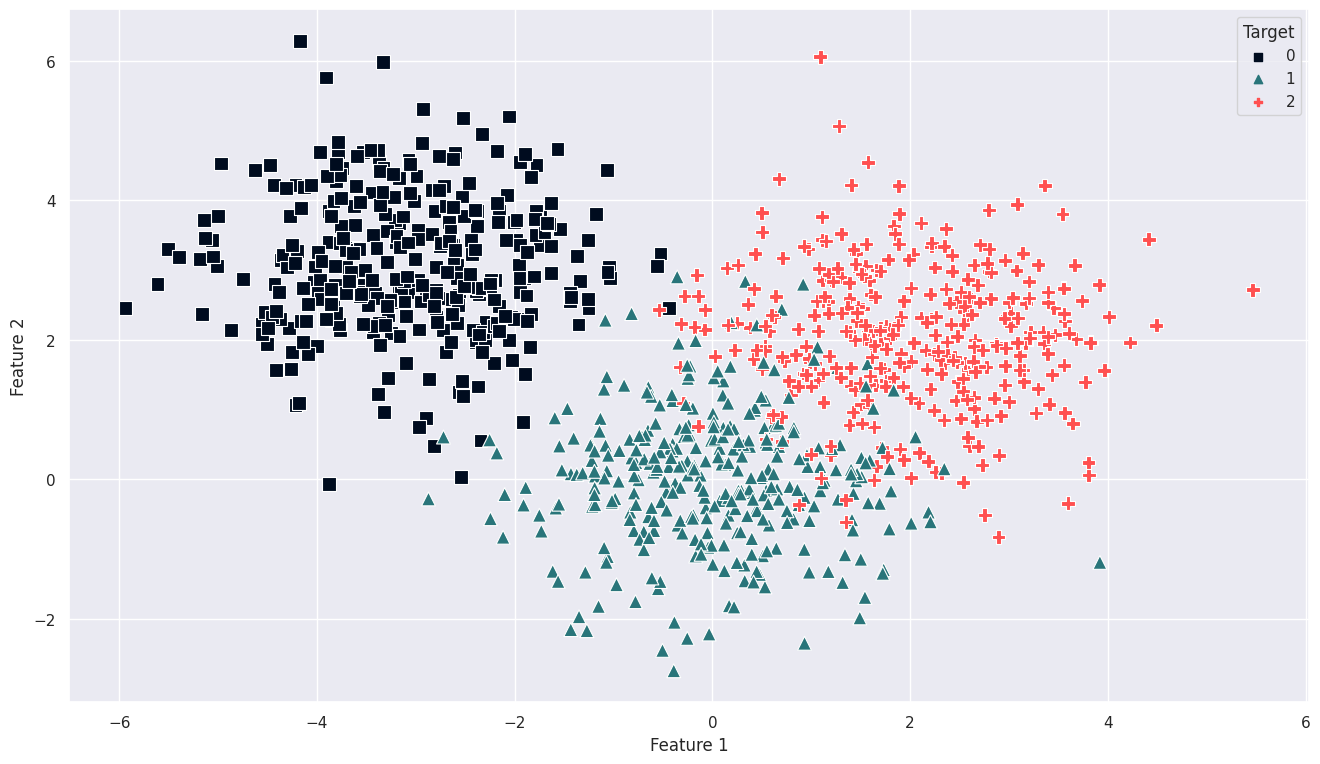

In [6]:
# Apply the seaborn style
sns.set()

# Set the size of the figure
plt.figure(figsize = (16, 9))

# Create a scatter plot.
# On the x-axis, we have the first feature.
# The y-axis we have placed the second feature.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'markers' parameter determines the shape of the points.
# The 'style' parameter connects markers to classes.
# The 's' parameter specifies the size of the points.
# The 'alpha' parameter controls the opacity of the datapoints.
# We have decided to set the 'legend' parameter equal to False as we will make no use of it in this example.
sns.scatterplot(x = 'Feature 1', y = 'Feature 2',
                data = data,
                hue = 'Target',
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = 'Target',
                s = 100);

### Visualizing the distribution of the points

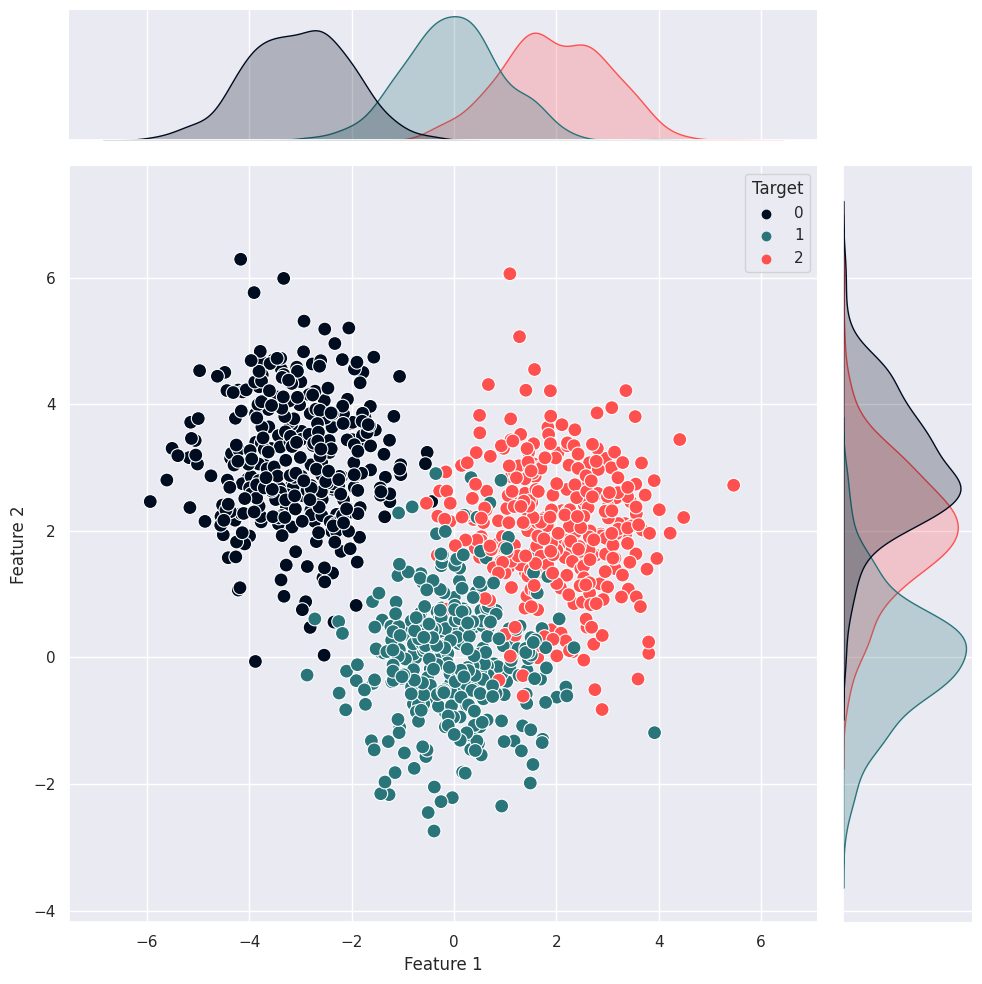

In [7]:
# Apply the seaborn style
sns.set()

# Create a seaborn jointplot.
sns.jointplot(x = 'Feature 1', y = 'Feature 2',
              data = data,
              hue = 'Target',
              palette = knn_palette,
              height = 10,
              s = 100,
              legend = True);

### Creating a train-test-split

In [8]:
# Create a training and a test dataset.
# Choose the test size such that 20% of the data goes to testing.
# Since 'train_test_split()' distributes the points randomly, we set a seed equal to 365
# so that the final results are identical each time we run the split.
# The 'stratify' argument allows for splitting the data in such a way that
# the training and the testing datasets contain an equal portion of samples
# from both classes.
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                    stratify = target)

### Creating the model

In [9]:
# Create a classifier and set a specific number of neighbours
clf = KNeighborsClassifier(n_neighbors = 2) #i want 2 neighbours

# Fit the data
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Predicting a sample

In [10]:
# Define the coordinates of a point whose class we want to identify.
feature_1 = -0.18
feature_2 = 3.2

In [11]:
# Predict the class of a sample given these two features.
clf.predict([[feature_1, feature_2]])

array([0])

In [12]:
# Get the distance to the neighbour and its index in the array
neighbors = clf.kneighbors([[feature_1, feature_2]]) #this are the 2 neighbours
neighbors

(array([[0.27086818, 0.34749744]]), array([[336, 215]]))

### Visualizing the neighbors

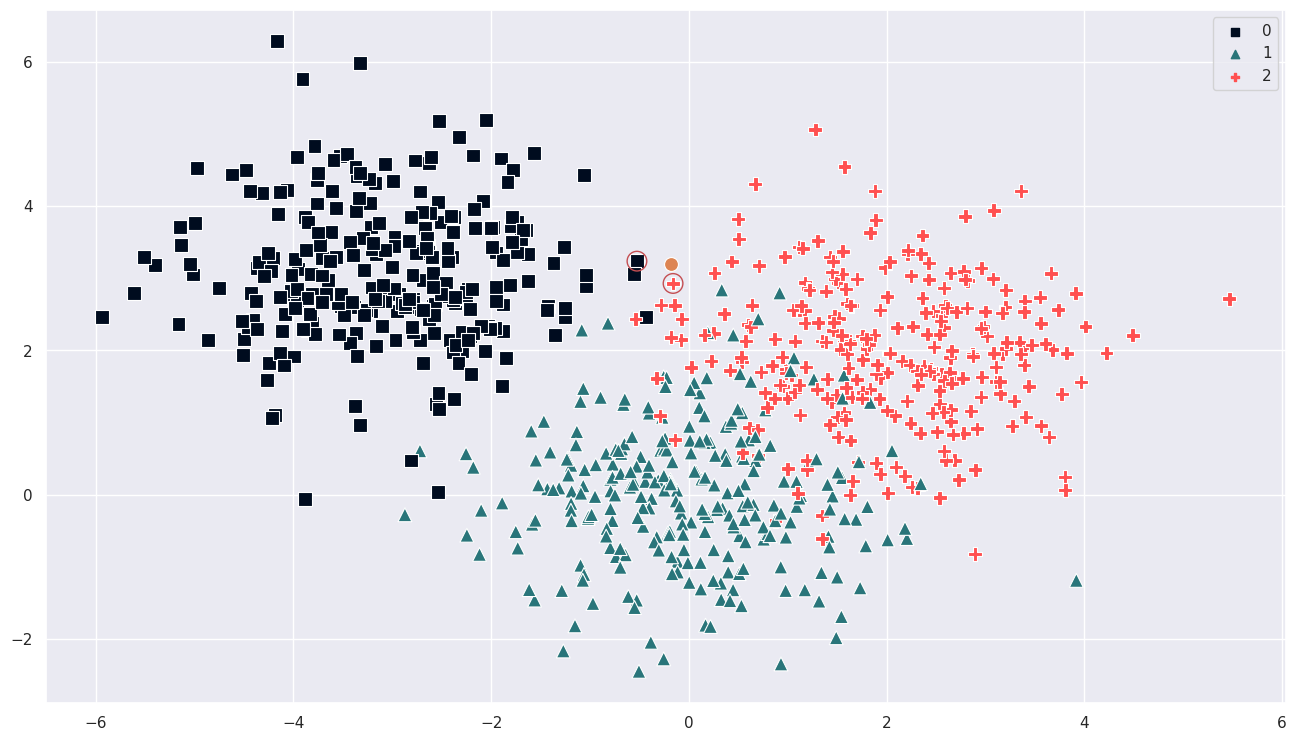

In [13]:
# Apply the seaborn style
sns.set()

plt.figure(figsize = (16, 9))

# Plot the datapoints from the training data
sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train,
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = y_train,
                s = 100,
                legend = True);

# Plot the point to be predicted
sns.scatterplot(x = [feature_1], y = [feature_2],
                style = [feature_2],
                markers = ['o'],
                s = 100,
                legend = False);

# A list to store the x-values of all neighbors
plot_x_train = []
# A list to store the y-values of all neighbors
plot_y_train = []

# Append all x- and y-values to the respective lists
for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

# Enclose all nearest neighbors
plt.scatter(plot_x_train,
            plot_y_train,
            s=200, facecolors='none', edgecolors='r');

### Getting the parameters of the model

In [14]:
# Get the parameters of the classifier
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

### Choosing a set of parameters to test

In [15]:
# Choose a set of parameters to test in the form of a dictionary.
parameters = {'n_neighbors':range(1, 51)}

### Create an instance of the GridSearchCV class

In [16]:
# Create an instance of the GridSearchCV class.
# We choose KNeighborsClassifier as an estimator.
# Choose the dictionary of parameters we want to cover.
# Choose a scoring metric. I have decided to go with accuracy.
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')

In [17]:
# Fit all models to the training data and choose the best one based on the highes accuracy.
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)}, scoring='accuracy')

In [18]:
# Return the parameters of the best model
grid_search.best_params_

{'n_neighbors': 10}

Best result --> biggest accuracy our model has 10 neighbours

In [19]:
# Make 'clf' an instance of the best model.
clf = grid_search.best_estimator_

In [20]:
clf

KNeighborsClassifier(n_neighbors=10)

In [21]:
# Display the score obtained by the best model.
grid_search.best_score_

0.9512499999999999

### Make predictions on the test dataset

In [22]:
# Predict the classes of the samples in the test dataset using the best model.
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

### Construct the confusion matrix

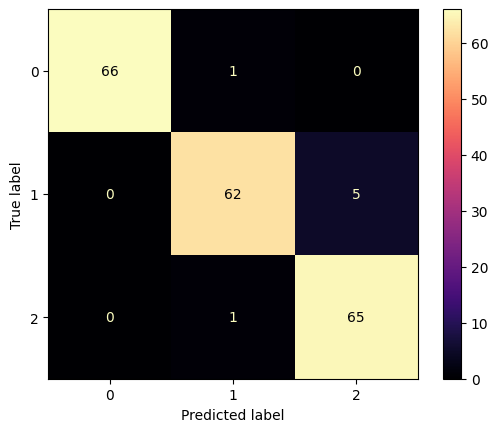

In [23]:
# Removing the seaborn visualization removes the white lines that come with it.
sns.reset_orig()

# Create a confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### Print out the classification report

In [24]:
# Print the classifcation report
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



In [25]:
import joblib

In [26]:
joblib.dump(clf, "knn2.pkl")

['knn2.pkl']

In [27]:
my_model = joblib.load("knn2.pkl")

In [28]:
from google.colab import files

files.download("knn2.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>